In [1]:
import mne 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import scipy

In [6]:
#Load unshuffled acc
subjects = ['sub05','sub06', 'sub07', 'sub08','sub09','sub10','sub11','sub12','sub13','sub14','sub15','sub16',
'sub18','sub19','sub20','sub21','sub22','sub23', 'sub25', 'sub26', 'sub27', 'sub28', 'sub29', 'sub30', 
'sub31', 'sub32', 'sub33', 'sub34', 'sub35', 'sub36', 'sub37', 'sub38', 'sub39', 'sub40', 'sub41', 'sub42', 'sub43', 
'sub44', 'sub45', 'sub46', 'sub47', 'sub48', 'sub49', 'sub50', 'sub51', 'sub52', 'sub53', 'sub55', 'sub56', 
'sub57', 'sub58', 'sub59', 'sub60', 'sub61', 'sub62',  
'sub64', 'sub65', 'sub66', 'sub67', 'sub68', 'sub69', 'sub70', 'sub72']



acctr = []
for subject in subjects:
    print(subject)
    acc_unshuff = pd.read_csv("../trf_results/{s}/fits_linguistic_{s}_within_nb_stan_notr.csv".format(s=subject))
    acc_unshuff = acc_unshuff[acc_unshuff['window'] == "none"]



    
    acc_shuff = []
    feats = [ 'ling_word_target', 'ling_word_dis', 'ling_phone_target', 'ling_phone_dis']
    #Load shuffled acc
    numit = 50
    for feat in feats:
        for it in range(0,numit):
            shuff = pd.read_csv("../trf_results/{s}/shuffle/fits_linguistic_{s}_{i}_{f}_within_nb_stan_notr.csv".format(s = subject, i = it, f = feat))
            shuff['feat'] = feat
            shuff['subject'] = subject
            shuff = shuff[shuff['window'] == "none"]
            acc_shuff.append(shuff)
    
    acc_shuff = pd.concat(acc_shuff)
    
    acc_shuff = acc_shuff.groupby(['trialnum', 'channel','feature_shuffle', 'subject'], as_index = False, sort = False).mean('fit')              
    acc_shuff['feature'] = acc_shuff['feature_shuffle']
    
    #Merge 
    accmere = pd.merge(acc_unshuff, acc_shuff, on = ['subject', 'trialnum', 'channel'])
    accmere['correlation'] = accmere['fit_x'] - accmere['fit_y'] 

    acctr.append(accmere)

sub05
sub06
sub07
sub08
sub09
sub10
sub11
sub12
sub13
sub14
sub15
sub16
sub18
sub19
sub20
sub21
sub22
sub23
sub25
sub26
sub27
sub28
sub29
sub30
sub31
sub32
sub33
sub34
sub35
sub36
sub37
sub38
sub39
sub40
sub41
sub42
sub43
sub44
sub45
sub46
sub47
sub48
sub49
sub50
sub51
sub52
sub53
sub55
sub56
sub57
sub58
sub59
sub60
sub61
sub62
sub64
sub65
sub66
sub67
sub68
sub69
sub70
sub72


In [7]:
acctr = pd.concat(acctr)
dfl=acctr.copy()
dfl = dfl.groupby(['subject', 'channel', 'feature_shuffle'], as_index = False, sort = False).mean('correlation')
dfl['feat'] = dfl['feature_shuffle']

Could not find a adjacency matrix for the data. Computing adjacency based on Delaunay triangulations.
-- number of adjacent vertices : 61
Clustering.
Using a threshold of 1.669804
stat_fun(H1): min=0.4394096464485588 max=3.2116781242192434
Running initial clustering …
Found 1 cluster


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #1 found 1 cluster to exclude from subsequent iterations


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #2 found 0 additional clusters to exclude from subsequent iterations
(array([[1.87014435, 1.52254135, 1.45896704, 0.91353134, 1.84542696,
        2.81555463, 2.29384877, 2.28131491, 1.90078471, 1.95988923,
        1.64829925, 3.03455922, 2.60611958, 3.01658861, 2.27490063,
        1.63539475, 1.94049931, 2.47388859, 2.81215284, 2.58332377,
        2.36958061, 2.23809946, 2.07728779, 1.84235619, 2.34029736,
        1.80648049, 1.11058291, 2.60967205, 2.70282728, 2.51348885,
        1.85325559, 1.81462516, 1.37739517, 3.21167812, 2.26035357,
        1.487145  , 2.77320648, 1.59785926, 2.29710118, 2.50626924,
        2.26149358, 2.03062007, 1.92684215, 3.14852879, 2.78778355,
        2.90395308, 2.47583447, 2.05306682, 2.17769904, 0.77638526,
        1.16539998, 2.9569876 , 2.72210709, 1.42618387, 1.76261505,
        2.35953072, 2.36743302, 1.86828869, 0.72076459, 0.43940965,
        0.74348961]]), [(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

/tmp/ipykernel_157191/528121219.py:64: RuntimeWarning: No clusters found, returning empty H0, clusters, and cluster_pv
  res_d = mne.stats.permutation_cluster_1samp_test(


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #1 found 1 cluster to exclude from subsequent iterations


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #2 found 0 additional clusters to exclude from subsequent iterations
(array([[ 2.25254288,  2.08199239,  1.93849019,  1.37029864,  1.72259951,
         1.24677859,  1.37517239,  1.75270273,  1.31140768,  1.28304216,
         1.34093321,  0.84571074,  0.63868132,  0.98031484,  0.61539607,
         0.20876029,  0.24655109,  1.18935674,  1.3807302 ,  2.1222652 ,
         1.3650093 ,  1.90536879,  1.14364373,  2.0318403 ,  2.51703198,
         1.2194514 ,  1.70087876,  1.98724537,  1.63074166,  2.18783471,
         1.75221057,  2.02513782,  1.60547888,  1.75959623,  1.12617116,
         1.81526346,  1.79432651,  1.05496531,  1.79010238,  1.81330423,
         0.13671539, -0.32260307,  0.05143682, -0.13628073, -0.49476567,
         0.3331162 , -0.34324873,  0.14842798, -0.38518619, -0.28180729,
        -0.28027093, -0.3713915 , -0.31202161,  0.15619894, -0.32405977,
        -0.26500672,  0.00480423,  0.31979464,  0.9534272 , -0.13618012,
        -0.1428823 ]]), [

/tmp/ipykernel_157191/528121219.py:64: RuntimeWarning: No clusters found, returning empty H0, clusters, and cluster_pv
  res_d = mne.stats.permutation_cluster_1samp_test(


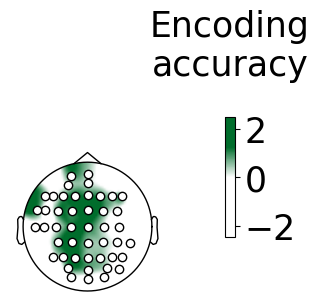

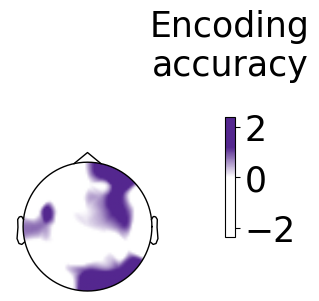

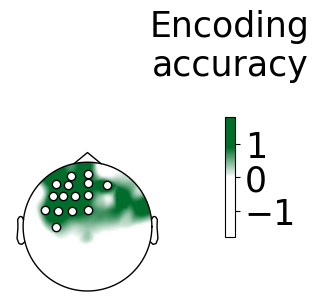

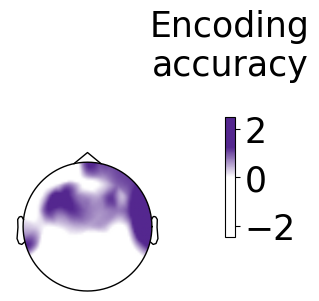

In [8]:
%run plotting_functions_within.ipynb

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as clr
import copy

cluster_dict = {}

feats = dfl['feat'].unique()

for feat in feats:
    plot_fits_clusters(feat)
    
    sname = "../figures/" + feat  + "_topo_within.svg"
    
    #plt.savefig(sname, bbox_inches = "tight")

In [7]:
sdf = acctr.groupby(['subject', 'feature_shuffle', 'trialnum'], as_index = False, sort = False).mean(['correlation'])

sdf = sdf[['subject', 'feature_shuffle', 'trialnum', 'correlation']]
sdf.to_csv('../statistics/fits_ling_within.csv')